In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/training_dataet.csv')

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438


In [4]:
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    auc, 
    precision_score, 
    recall_score
)


In [5]:
df['class'].value_counts()

class
-0.992188    59000
 0.992188     1000
Name: count, dtype: int64

In [6]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
numeric_feature=[feature for feature in df.columns if [df[feature].dtype!='O']]


In [7]:
categorical_features

[]

In [8]:
print('number of numerical features are {}:{}'.format(len(numeric_feature),numeric_feature))

number of numerical features are 171:['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_0

In [9]:
df.head(100)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.992188,-0.117188,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.210938,-0.203125,-0.195312,-0.171875,-0.085938,-0.062500,0.960938,-0.062500,-0.023438,-0.023438
96,-0.992188,-0.320312,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.359375,-0.351562,-0.335938,-0.320312,0.023438,-0.171875,-0.304688,-0.171875,-0.023438,-0.023438
97,-0.992188,-0.125000,0.218750,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.023438,0.101562,0.070312,-0.054688,-0.179688,-0.164062,-0.078125,0.062500,-0.023438,-0.023438
98,-0.992188,-0.179688,0.359375,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.156250,-0.117188,-0.093750,-0.007812,-0.140625,-0.156250,-0.132812,-0.125000,-0.023438,-0.023438


In [10]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

Since we make the Bar plot for the Categorical features and Histogram for the Continous variables and as in our dataset we have continous varibles only so we will be plotting the histogram so see the distribution fo data

In [11]:
for i in df.columns:
  print('The range for the feature {} is {}-{}'.format(i,max(df[i]),min(df[i])))

The range for the feature class is 0.9921875--0.9921875
The range for the feature aa_000 is 0.9921875--0.40625
The range for the feature ab_000 is 0.9921875--0.2890625
The range for the feature ac_000 is 0.9921875--0.46875
The range for the feature ad_000 is 0.9921875--0.0078125
The range for the feature ae_000 is 0.9921875--0.046875
The range for the feature af_000 is 0.9921875--0.0546875
The range for the feature ag_000 is 0.9921875--0.0078125
The range for the feature ag_001 is 0.9921875--0.03125
The range for the feature ag_002 is 0.9921875--0.0546875
The range for the feature ag_003 is 0.9921875--0.1171875
The range for the feature ag_004 is 0.9921875--0.1875
The range for the feature ag_005 is 0.9921875--0.3359375
The range for the feature ag_006 is 0.9921875--0.421875
The range for the feature ag_007 is 0.9921875--0.3515625
The range for the feature ag_008 is 0.9921875--0.1640625
The range for the feature ag_009 is 0.9921875--0.03125
The range for the feature ah_000 is 0.9921875

In [12]:
df['class'].unique()

array([-0.9921875,  0.9921875])

Converting  the Numeric feature Class to Categorical


In [13]:
df['class']

0       -0.992188
1       -0.992188
2       -0.992188
3       -0.992188
4       -0.992188
           ...   
59995   -0.992188
59996   -0.992188
59997   -0.992188
59998   -0.992188
59999   -0.992188
Name: class, Length: 60000, dtype: float64

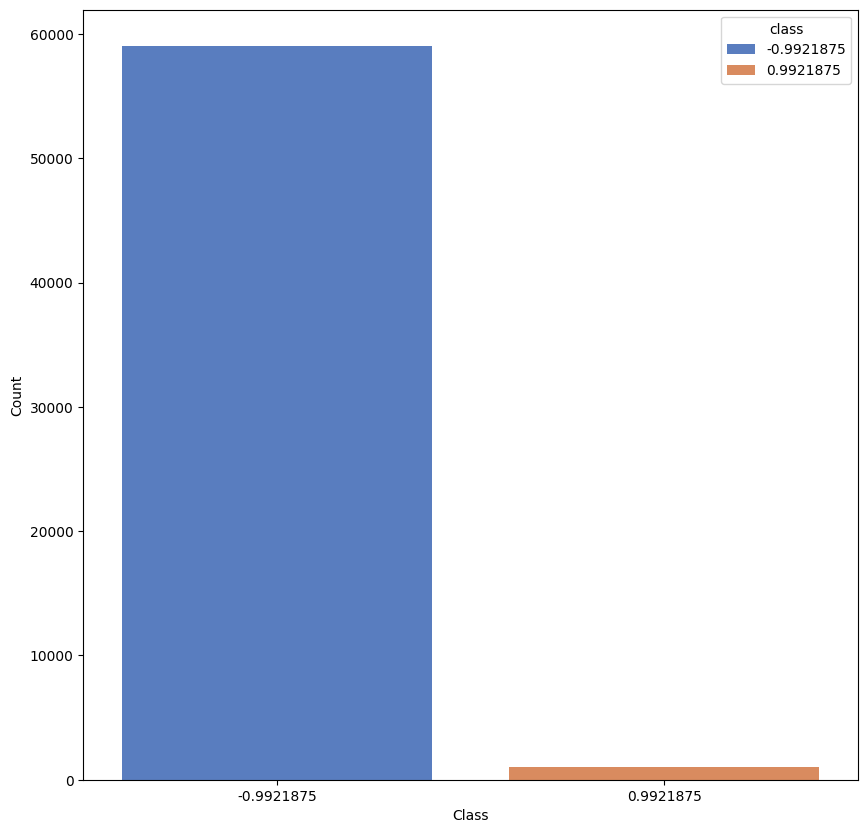

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x='class',data=df,palette='muted',hue='class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Outlier Detection

In [15]:
2

2

Text(0.5, 1.0, 'Missing Value Count')

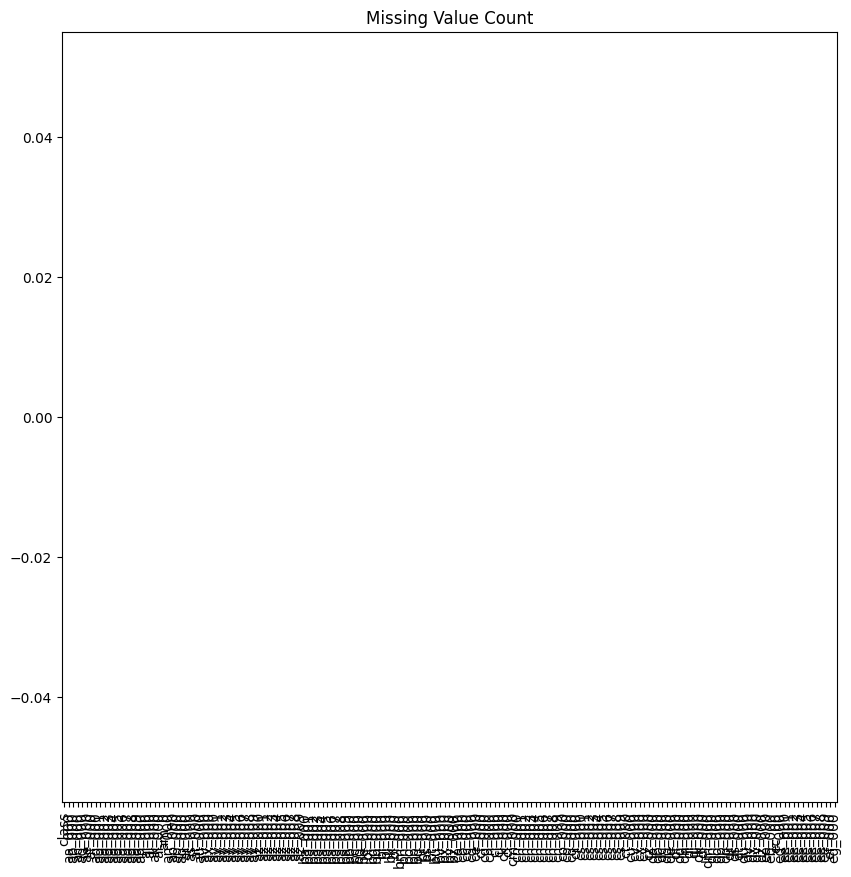

In [19]:
plt.figure(figsize=(10,10))
missing_value=df.isnull().sum()
missing_value.plot(kind='bar',color='blue')
plt.title('Missing Value Count')


So our dataset does not contain any missing value so we need not to impute any data values for any if the given features